In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
train_values = pd.read_csv('drive/My Drive/#1 Operation Alpha/Heart Attack Prediction/train_values.csv')
train_labels = pd.read_csv('drive/My Drive/#1 Operation Alpha/Heart Attack Prediction/train_labels.csv')
test_values = pd.read_csv('drive/My Drive/#1 Operation Alpha/Heart Attack Prediction/test_values.csv')

In [0]:
train_values.head().T

,0,1,2,3,4
patient_id,0z64un,ryoo3j,yt1s1x,l2xjde,oyt4ek
slope_of_peak_exercise_st_segment,1,2,1,1,3
thal,normal,normal,normal,reversible_defect,reversible_defect
resting_blood_pressure,128,110,125,152,178
chest_pain_type,2,3,4,4,1
num_major_vessels,0,0,3,0,0
fasting_blood_sugar_gt_120_mg_per_dl,0,0,0,0,0
resting_ekg_results,2,0,2,0,2
serum_cholesterol_mg_per_dl,308,214,304,223,270
oldpeak_eq_st_depression,0,1.6,0,0,4.2


In [0]:
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [0]:
for i in train_values.columns:
  print(train_values[i].isna().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [0]:
train_values = train_values.sort_values(by = ['patient_id'],ascending= True)
train_labels = train_labels.sort_values(by = ['patient_id'],ascending= True)

In [0]:
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
156,02cipp,1,normal,140,1,2,0,0,239,1.8,0,69,151,0
135,08usun,1,reversible_defect,120,4,0,0,0,177,0.4,1,65,140,0
110,0g192k,2,reversible_defect,128,4,1,0,0,263,0.2,1,64,105,1
33,0n5fu0,1,normal,180,4,0,0,0,325,0.0,0,64,154,1
126,0ryxtv,2,normal,102,4,0,0,2,265,0.6,0,42,122,0


In [0]:
train_labels.head()

,patient_id,heart_disease_present
156,02cipp,0
135,08usun,0
110,0g192k,0
33,0n5fu0,0
126,0ryxtv,0


In [0]:
train_values['heart_disease_present'] = train_labels['heart_disease_present']

In [0]:
train_values.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [0]:
train_values.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [0]:
train_values.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [0]:
train_values.slope_of_peak_exercise_st_segment.value_counts()

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


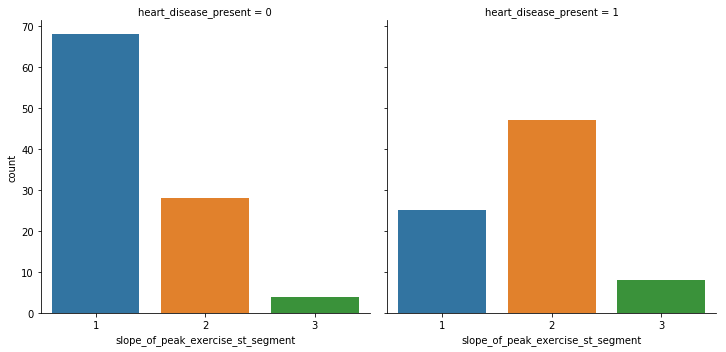

In [0]:
import seaborn as sns
sns.factorplot(x='slope_of_peak_exercise_st_segment',
               col='heart_disease_present', kind='count', data=train_values)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


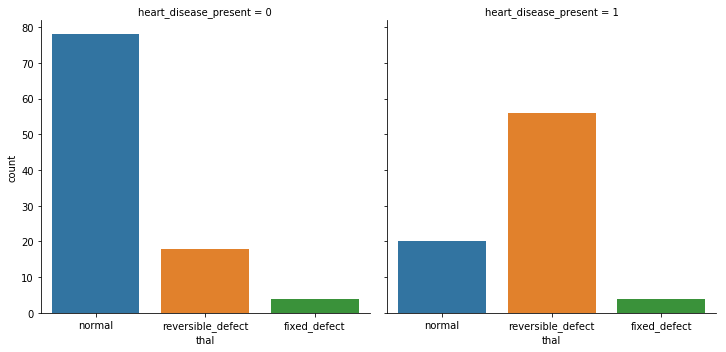

In [0]:
sns.factorplot(x='thal',
               col='heart_disease_present', kind='count', data=train_values)

In [0]:
train_values.shape

(180, 15)

In [0]:
def func(x):
  if x=='normal':
    return 0
  elif x=='reversible_defect':
    return 1
  elif x=='fixed_defect':
    return 2
train_values.thal = train_values.thal.apply(lambda x: func(x))

In [0]:
train_values.thal.value_counts()

0    98
1    74
2     8
Name: thal, dtype: int64

In [0]:
train_values.chest_pain_type.value_counts()

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def minMaxScale(x):
  return (x-x.min())/(x.max()-x.min())
###################################
y = train_values.heart_disease_present
x = train_values.drop(['patient_id','heart_disease_present'],axis = 1)
x['resting_blood_pressure'] = minMaxScale(x['resting_blood_pressure'])
x['serum_cholesterol_mg_per_dl'] = minMaxScale(x['serum_cholesterol_mg_per_dl'])
x['oldpeak_eq_st_depression'] = minMaxScale(x['oldpeak_eq_st_depression'])
x['age'] = minMaxScale(x['age'])
x['max_heart_rate_achieved'] = minMaxScale(x['max_heart_rate_achieved'])

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(x)


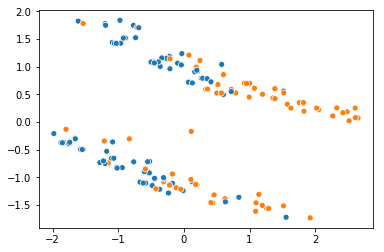

In [0]:
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue = y,legend=False)

In [0]:
def standardizer(x):
  return (x-x.mean())/x.std()
y_std = train_values.heart_disease_present
x_std = train_values.drop(['patient_id','heart_disease_present'],axis = 1)
x_std['resting_blood_pressure'] = standardizer(x_std['resting_blood_pressure'])
x_std['serum_cholesterol_mg_per_dl'] = standardizer(x_std['serum_cholesterol_mg_per_dl'])
x_std['oldpeak_eq_st_depression'] = standardizer(x_std['oldpeak_eq_st_depression'])
x_std['age'] = standardizer(x_std['age'])
x_std['max_heart_rate_achieved'] = standardizer(x_std['max_heart_rate_achieved'])

pca = PCA(n_components = 2)
X_pca_std = pca.fit_transform(x_std)


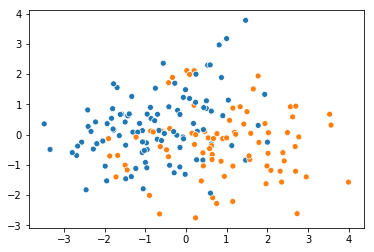

In [0]:
sns.scatterplot(x=X_pca_std[:,0],y=X_pca_std[:,1],hue = y_std,legend=False)

In [0]:
from sklearn.manifold import TSNE
X_embedded_std = TSNE(n_components=2).fit_transform(x_std)

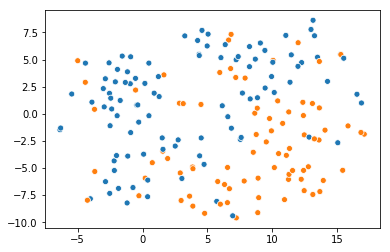

In [0]:
sns.scatterplot(x=X_embedded_std[:,0],y=X_embedded_std[:,1],hue = y_std,legend=False)

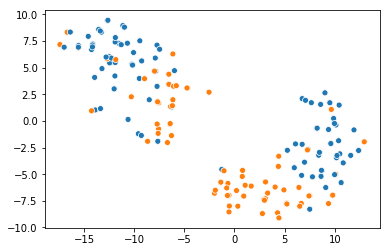

In [0]:
X_embedded_min = TSNE(n_components=2).fit_transform(x)
sns.scatterplot(x=X_embedded_min[:,0],y=X_embedded_min[:,1],hue = y,legend=False)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01,0.1,1,10,100,1000],'penalty':('l1','l2')}
logit = LogisticRegression()
clf = GridSearchCV(logit, parameters, cv=5,scoring = 'neg_log_loss')
clf.fit(X_pca,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [0]:
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.best_score_

-0.48074397461798224

In [0]:
logistic = LogisticRegression(C=1,penalty = 'l2')
logistic.fit(X_pca,y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def func(x):
  if x=='normal':
    return 0
  elif x=='reversible_defect':
    return 1
  elif x=='fixed_defect':
    return 2
test_values.thal = test_values.thal.apply(lambda x: func(x))

In [0]:
x_train = test_values.drop(['patient_id'],axis = 1)
x_train['resting_blood_pressure'] = minMaxScale(x_train['resting_blood_pressure'])
x_train['serum_cholesterol_mg_per_dl'] = minMaxScale(x_train['serum_cholesterol_mg_per_dl'])
x_train['oldpeak_eq_st_depression'] = minMaxScale(x_train['oldpeak_eq_st_depression'])
x_train['age'] = minMaxScale(x_train['age'])
x_train['max_heart_rate_achieved'] = minMaxScale(x_train['max_heart_rate_achieved'])

pca = PCA(n_components = 2)
X_pca_train = pca.fit_transform(x_train)

In [0]:
y_train = logistic.predict_proba(X_pca_train)

In [0]:
y_train

array([[0.86073562, 0.13926438],
       [0.56701857, 0.43298143],
       [0.47185217, 0.52814783],
       [0.23252611, 0.76747389],
       [0.62553956, 0.37446044],
       [0.35336045, 0.64663955],
       [0.94021845, 0.05978155],
       [0.77602045, 0.22397955],
       [0.06311927, 0.93688073],
       [0.58339541, 0.41660459],
       [0.27563732, 0.72436268],
       [0.40462835, 0.59537165],
       [0.40934675, 0.59065325],
       [0.61884152, 0.38115848],
       [0.53619513, 0.46380487],
       [0.75172255, 0.24827745],
       [0.20381359, 0.79618641],
       [0.38530879, 0.61469121],
       [0.64933842, 0.35066158],
       [0.88783798, 0.11216202],
       [0.0715994 , 0.9284006 ],
       [0.63471442, 0.36528558],
       [0.24692048, 0.75307952],
       [0.41155732, 0.58844268],
       [0.13730917, 0.86269083],
       [0.97775101, 0.02224899],
       [0.91580617, 0.08419383],
       [0.2796878 , 0.7203122 ],
       [0.08729502, 0.91270498],
       [0.76768693, 0.23231307],
       [0.

In [0]:
logistic.predict(X_pca_train)

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1])

In [0]:
ans = pd.DataFrame({'patient_id':test_values['patient_id'],'heart_disease_present':y_train[:,0]})

In [0]:
ans.to_csv('drive/My Drive/#1 Operation Alpha/Heart Attack Prediction/ansV1.csv',index = False)

In [0]:
ans.head()

,patient_id,heart_disease_present
76,073vc5,0.860736
42,0z3fob,0.567019
56,112e9h,0.471852
37,16ceba,0.232526
77,18abn0,0.625540


In [0]:
sub = pd.read_csv('drive/My Drive/#1 Operation Alpha/Heart Attack Prediction/submission_format.csv')

In [0]:
test_values[test_values.patient_id.isin(sub.patient_id)].shape

(90, 14)

In [0]:
sub.head()

,patient_id,heart_disease_present
0,olalu7,0.5
1,z9n6mx,0.5
2,5k4413,0.5
3,mrg7q5,0.5
4,uki4do,0.5


In [0]:
ans2 = pd.DataFrame(columns = ['patient_id','heart_disease_present'])
for i in sub.values:
  ans2.loc[len(ans2)] = ans[ans.patient_id == i[0]].values[0]

In [0]:
ans2.to_csv('drive/My Drive/#1 Operation Alpha/Heart Attack Prediction/ansV1.csv',index = False)